### A/B-тест крупного интернет-магазина



<img src='https://i.ibb.co/pnmkvGW/AB-santa.jpg' width=500, heigth=350>

**Описание проекта**

Вы — аналитик крупного интернет-магазина. Вместе с отделом маркетинга вы подготовили список гипотез для увеличения выручки.
Приоритизируйте гипотезы, запустите A/B-тест и проанализируйте результаты.

**Цели исследования:**
1. Применить фреймворк ICE для приоритизации гипотез
2. Применить фреймворк RICE для приоритизации гипотез
3. Сравнить приоритизацию гипотез RICE vs ICE
4. Построить график кумулятивной выручки по группам. Сделать выводы и предположения.
5. Построить график кумулятивного среднего чека по группам. Сделать выводы и предположения.
6. Построить график относительного изменения кумулятивного среднего чека группы B к группе A. Сделать выводы и предположения.
7. Построить график кумулятивного среднего количества заказов на посетителя по группам. Сделать выводы и предположения.
8. Построить график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. Сделать выводы и предположения.
9. Построить точечный график количества заказов по пользователям. Сделать выводы и предположения.
10. Посчитать 95-й и 99-й перцентили количества заказов на пользователя. Выбрать границу для определения аномальных пользователей.
11. Построить точечный график стоимостей заказов. Сделать выводы и предположения.
12. Посчитать 95-й и 99-й перцентили стоимости заказов. Выберать границу для определения аномальных заказов.
13. Посчитать статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. Сделать выводы и предположения.
14. Посчитать статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделать выводы и предположения.
15. Посчитать статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. Сделать выводы и предположения.
16. Посчитать статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделать выводы и предположения.
17. Принять решение по результатам теста и объяснить его. Варианты решений: 
    * 1. Остановить тест, зафиксировать победу одной из групп. 
    * 2. Остановить тест, зафиксировать отсутствие различий между группами. 
    * 3. Продолжить тест.

**Ход исследования:**

Моё исследование пройдет в несколько этапов:
* Загружу данные, файл '/datasets/hypothesis.csv' - 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effor
* и из файлов '/datasets/orders.csv' (заказы) и '/datasets/visitors.csv' (посетители) -результаты A/B-теста
* Обзор данных, посмотрю их качество
* Предобработка данных (проверка типов данных, проверка на пропуски и их заполнение или удаление, проверка категориальных значений, проверка на аномальные значения, проверка на дубликаты)
* Расчеты и добавление новых столбцов-результатов в таблицы
* Проведение анализа по целям исследования
* Написание общего вывода

## 1. Загрузка данных

### 1.1 Импортируем библиотеки, откроем csv

In [1]:
import pandas as pd
# сбросим ограничение на кол-во символов ячейке
pd.set_option('display.max_colwidth', None)

import numpy as np

import matplotlib.pyplot as plt
# magic function, отображает фигуру в блокноте рядом с кодом:
%matplotlib inline
# matplotlib/plot, графики с высоким разрешением:
%config InlineBackend.figure_format='retina'

from pandas.plotting import register_matplotlib_converters
# конвертеры, которые позволяют использовать типы pandas в matplotlib  
register_matplotlib_converters()

import scipy.stats as stats
import datetime as dt

In [2]:
# откроем файл *.csv
try:
    hypothesis = pd.read_csv('hypothesis.csv')
    orders = pd.read_csv('orders.csv')
    visitors = pd.read_csv('visitors.csv')
except:
    from google.colab import drive
    drive.mount('/content/drive')
    hypothesis = pd.read_csv('/datasets/hypothesis.csv')
    orders = read_csv('/datasets/orders.csv')
    visitors = read_csv('/datasets/visitors.csv')    

### 1.2 Основная инфа о дф

In [3]:
display(hypothesis.info())
hypothesis.head(1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


None

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6


In [4]:
display(orders.info())
orders.head(1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


None

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B


In [5]:
display(visitors.info())
visitors.head(1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


None

,date,group,visitors
0,2019-08-01,A,719


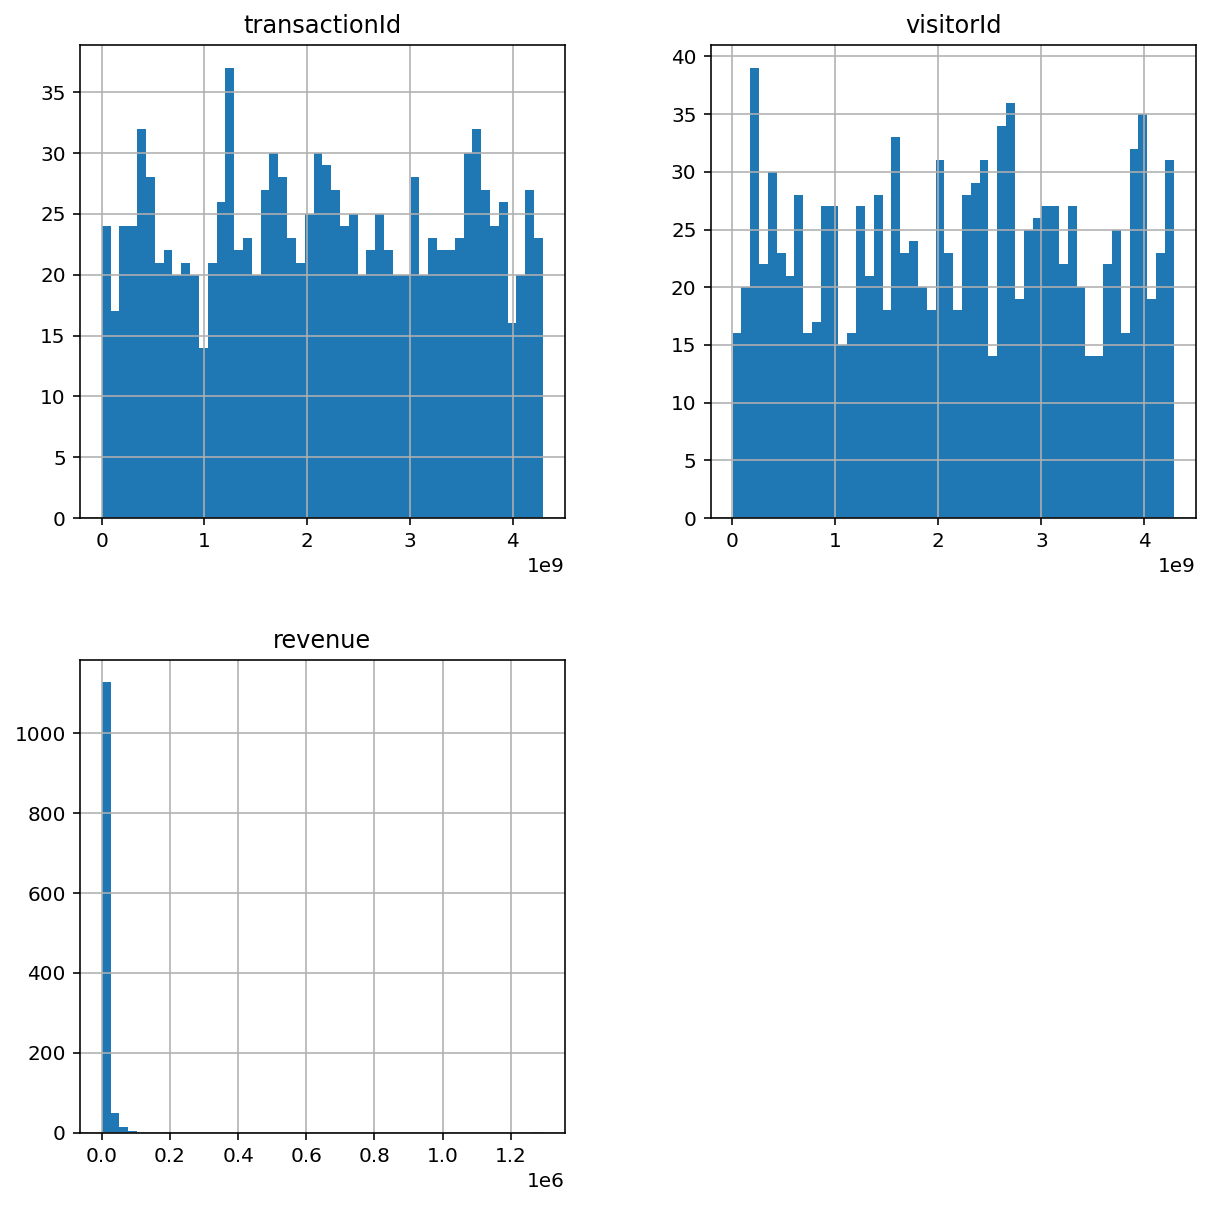

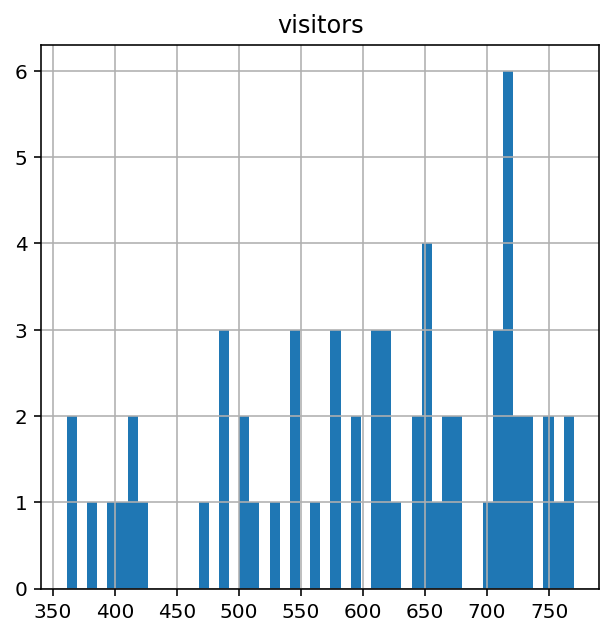

In [6]:
# построим гистограммы по всем числовым столбцам, чтобы сразу посмостеть выбросы
orders.hist(bins=50, figsize=(10,10))
visitors.hist(bins=50, figsize=(5,5))
plt.show()

Есть выбросы в revenue(доход), основные данные распределены в начале

## 2. Предобработка данных
Пропусков по info нет, надо только обработать формат даты

### 2.1. Преобразуем типы данных

In [7]:
orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))
visitors['date'] = visitors['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

### 2.2. Проверка на дубликаты и качество данных

In [8]:
# проверим явные дубликаты всех строк
display(orders.duplicated().sum())
display(visitors.duplicated().sum())

0

0

Явных дубликатов нет.

In [9]:
# проверим на дубликаты таблицу orders,visitors, где 62 строчки по инфо
print(orders[['date']].value_counts().sort_index().head(),
      orders[['date']].value_counts().sort_index().tail())
print(visitors[['date']].value_counts().sort_index().head(),
      visitors[['date']].value_counts().sort_index().tail())

date      
2019-08-01    45
2019-08-02    44
2019-08-03    40
2019-08-04    33
2019-08-05    48
dtype: int64 date      
2019-08-27    44
2019-08-28    45
2019-08-29    42
2019-08-30    35
2019-08-31    32
dtype: int64
date      
2019-08-01    2
2019-08-02    2
2019-08-03    2
2019-08-04    2
2019-08-05    2
dtype: int64 date      
2019-08-27    2
2019-08-28    2
2019-08-29    2
2019-08-30    2
2019-08-31    2
dtype: int64


У нас данные за 1 месяц август с 1-31 день

In [10]:
# проверим кол-во групп в таблице visitors
print(orders[['group']].value_counts())
visitors[['group']].value_counts()

group
B        640
A        557
dtype: int64


group
A        31
B        31
dtype: int64

* В таблице visitors групп 2: А и В. Все ровно 50/50 по дням.
* В таблице orders количество пользователей в группе B немного больше.

In [11]:
orders['revenue'].value_counts().sort_index()

50         4
60         2
70         1
75         1
76         1
          ..
86620      1
92550      1
93940      1
202740     1
1294500    1
Name: revenue, Length: 713, dtype: int64

Среди выручки заказов нет значения 0. Мин: 50, Макс: 1 294 500.

In [12]:
# проверим кол-во уникальных аользователей в orders
print(len(orders['visitorId'].value_counts()))
orders['visitorId'].value_counts()

1031


4256040402    11
2458001652    11
2378935119     9
2038680547     8
199603092      5
              ..
2406916810     1
1255412427     1
3866069709     1
54447517       1
3013339133     1
Name: visitorId, Length: 1031, dtype: int64

In [13]:
# проверим уникальность заказов
orders['transactionId'].duplicated().sum()
# все заказы уникальны

0

In [14]:
# Проверим не попадают ли какие-то пользователи в обе группы - по таблице с заказами
id_ab = orders.groupby(['visitorId', 'group'])[['transactionId']].count().reset_index()
filter_id_ab = id_ab[id_ab.groupby('visitorId')['group'].transform('nunique') > 1]
display(filter_id_ab)
# посчитаем их кол-во
filter_id_ab['visitorId'].nunique()

,visitorId,group,transactionId
2,8300375,A,1
3,8300375,B,1
45,199603092,A,4
46,199603092,B,1
53,232979603,A,1
...,...,...,...
1065,4186807279,B,2
1079,4256040402,A,7
1080,4256040402,B,4
1083,4266935830,A,1


58

Есть 58 из 1031 уникальных пользователей которые попали и в группу А и в группу В в дф orders. Из 1197 посещений было 116 таких строк, около 10%. Но из дф visitors мы не сможем удалить этих пользователей (потому что не сможем их отделить от общей стастистики), а эти таблицы связаны и будут обе использоваться. Поэтому можно их оставить чтобы не было расхождения.

## 3. Приоритизация гипотез (задач)

### 3.1 Применить фреймворк ICE для приоритизации гипотез
ICE (от англ. impact * confidence / effort, «влияние* уверенность / усилия») 

In [15]:
# посчитаем ICE
hypothesis['ICE'] = round(hypothesis['Impact'] * hypothesis['Confidence'] / hypothesis['Efforts'], 1)

# выведем в порядке убывания
hypothesis[['Hypothesis', 'ICE']].sort_values(by='ICE', ascending=False)

,Hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.2
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.1
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.0


Наиболее перспективные гипотезы по ICE:
- Запустить акцию, дающую скидку на товар в день рождения	16.2
- Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей 13.3

### 3.2 Применить фреймворк RICE для приоритизации гипотез
Фреймворк RICE состоит из четырёх компонент:
- Reach — скольких пользователей затронет изменение, которое вы хотите внести;
- Impact — насколько сильно изменение повлияет на пользователей, их опыт и удовлетворение от продукта;
- Confidence — насколько вы уверены, что это изменение повлияет на пользователей именно так; 
- Efforts — сколько стоит протестировать эту гипотезу. 

In [16]:
# посчитаем RICE
hypothesis['RICE'] = hypothesis['Reach'] *  hypothesis['Impact'] *  hypothesis['Confidence'] /  hypothesis['Efforts']

# выведем в порядке убывания
hypothesis[['Hypothesis','RICE']].sort_values(by='RICE', ascending=False)

,Hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


Наиболее перспективные гипотезы RICE:
- Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок	-112
- Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа -56

### 3.3 Сравнить приоритизацию гипотез RICE vs ICE

In [17]:
hypothesis.sort_values(by='RICE', ascending=False)

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.2,112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.0,56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.3,40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.0,40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.2,16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.1,9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.0,4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.3,4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.0,3.0


* Гипозеза 7 по RICE на 1ом месте, а по ICE на 3ем. Потому что RICE еще учитывает Reach — скольких пользователей затронет изменение, это тоже важно и дает большой импакт, лучше выбирать по RICE.

## 4. Анализ A/B-теста
Мы провели A/B-тест и получили результаты, которые описаны в файлах /datasets/orders.csv и /datasets/visitors.csv.

### 4.1 Построить график кумулятивной выручки по группам. Сделать выводы и предположения.

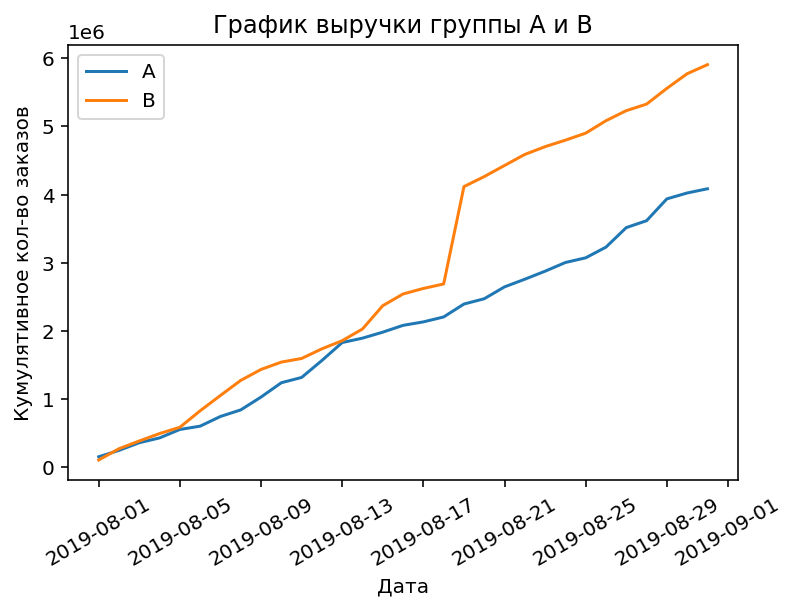

In [18]:
# создадим дф с уник значениями дата-группа АБ
datesGroups = orders[['date', 'group']].drop_duplicates()

# сагрегируем данные таблицы заказов
ordersAggregated = datesGroups.apply(
    lambda x: orders[np.logical_and(orders['date'] <= x['date'],
                                    orders['group'] == x['group'])]
    .agg({'date': 'max',
          'group': 'max',
          'transactionId': 'nunique',
          'visitorId': 'nunique',
          'revenue': 'sum'}),
    axis=1).sort_values(by=['date', 'group'])

# сагрегируем данные таблицы посетителей по дням
visitorsAggregated = datesGroups.apply(
    lambda x: visitors[np.logical_and(visitors['date'] <= x['date'],
                                      visitors['group'] == x['group'])]
    .agg({'date': 'max', 'group': 'max', 'visitors': 'sum'}),
    axis=1).sort_values(by=['date', 'group'])

# соединим 2 таблицы
cumulativeData = ordersAggregated.merge(
    visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])

cumulativeData.columns = [
    'date',
    'group',
    'transactionId_n',
    'visitorId_n',
    'revenue',
    'visitors',
]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'transactionId_n']]
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'transactionId_n']]

# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.title('График выручки группы А и В')
plt.xlabel('Дата')
plt.ylabel('Кумулятивное кол-во заказов')
plt.xticks(rotation=30)
plt.legend()
plt.show()

* Кумулятивная выручка группы В опережает группу А. Но есть резкий скачок (аномальный заказ-выброс), но вроде он не повлиял на общий тренд группы В.

### 4.2  Построить график кумулятивного среднего чека по группам. Сделать выводы и предположения.

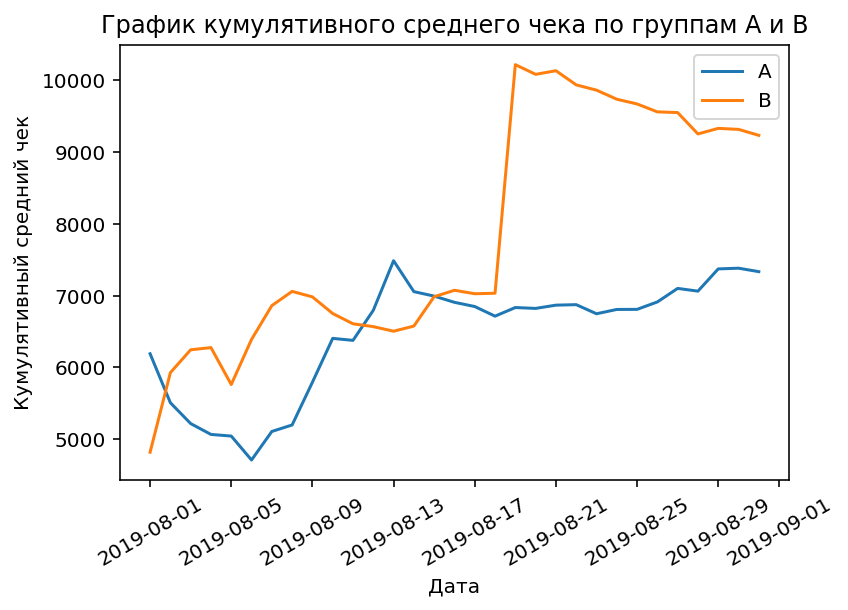

In [19]:
# выручку / кол-во транзакций для А и В
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['transactionId_n'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['transactionId_n'], label='B')
plt.title('График кумулятивного среднего чека по группам A и В')
plt.xlabel('Дата')
plt.ylabel('Кумулятивный средний чек')
plt.xticks(rotation=30)
plt.legend()
plt.show()

* В группе "В" есть точка резкого повышения среднего чека, скорее всего это аномальный заказ-выброс который поднял средее а потом среднее обратно начало снижаться к трендовой.

### 4.3  Построить график относительного изменения кумулятивного среднего чека группы B к группе A. Сделать выводы и предположения.

,date,revenueA,transactionId_nA,revenueB,transactionId_nB
0,2019-08-01,148579,24,101217,21


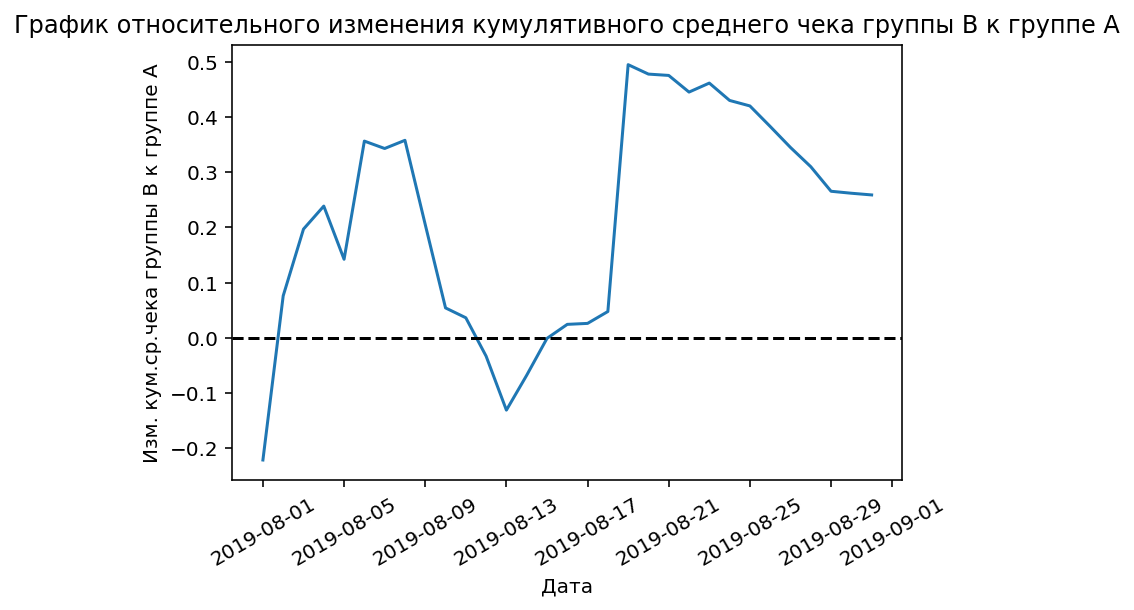

In [20]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date',
                                                   right_on='date', how='left', suffixes=['A', 'B'])
display(mergedCumulativeRevenue.head(1))

# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'],
         (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['transactionId_nB'])/
         (mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['transactionId_nA'])-1)
# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--') 
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A')
plt.xlabel('Дата')
plt.ylabel('Изм. кум.ср.чека группы B к группе A')
plt.xticks(rotation=30)
plt.show()

* Результат отношения среднего чека резко поменялись в несколько дат как вверх так и вниз. Видимо в эти даты были совершены аномальные заказы-выбросы.

### 4.4  Построить график кумулятивного среднего количества заказов на посетителя по группам. Сделать выводы и предположения.

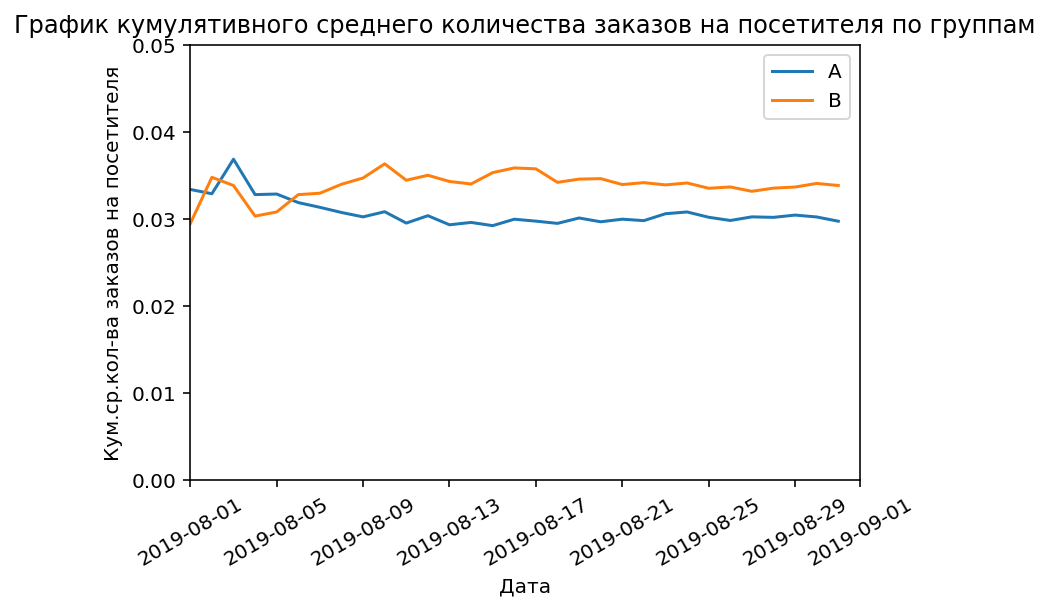

In [21]:
# считаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['transactionId_n']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим графики
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()
# задаем масштаб осей
plt.axis([dt.datetime(2019, 8, 1), dt.datetime(2019, 9, 1), 0, 0.05])
plt.title('График кумулятивного среднего количества заказов на посетителя по группам')
plt.xlabel('Дата')
plt.ylabel('Кум.ср.кол-ва заказов на посетителя')
plt.xticks(rotation=30)
plt.show()

* По кумулятивного среднего количества заказов на посетителя сегмент В выровнялся и зафиксировался примерно около одного значения, больше значения сегмента А. Колебания небольшие от 3% до 4%.

### 4.5  Построить график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. Сделать выводы и предположения.

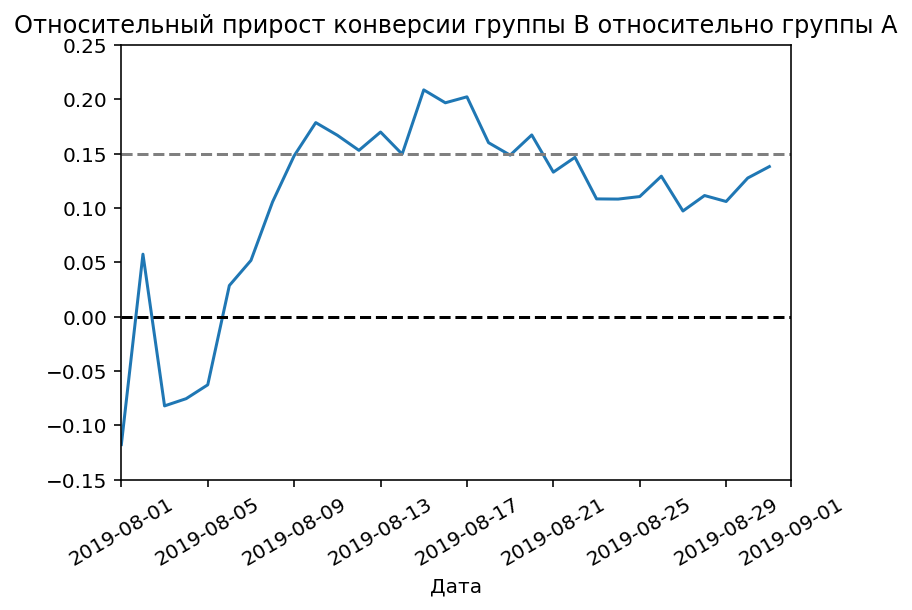

In [22]:
# Объединим таблицы cumulativeDataA и cumulativeDataB
mergedCumulativeConversions = (cumulativeDataA[['date','conversion']]
                               .merge(cumulativeDataB[['date','conversion']],
                                      left_on='date',
                                      right_on='date',
                                      how='left',
                                      suffixes=['A', 'B']))
# построим график
plt.plot(mergedCumulativeConversions['date'],
         mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1)
plt.title('Относительный прирост конверсии группы B относительно группы A')
plt.xlabel('Дата')
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.15, color='grey', linestyle='--')
plt.axis(["2019-08-1", '2019-09-1', -0.15, 0.25])
plt.xticks(rotation=30)
plt.show()

* В начале теста А и В группы были примерно на одном уровне, затем сегмент В выровнялся и зафиксировался примерно около одного значения, больше значения сегмента А. Группа В зафиксировала прирост примерно на 15% больше чем группа А.

### 4.6 Построить точечный график количества заказов по пользователям. Сделать выводы и предположения.

       visitorId  transaction
1023  4256040402           11
591   2458001652           11
569   2378935119            9
487   2038680547            8
44     199603092            5
744   3062433592            5
55     237748145            5
917   3803269165            5
299   1230306981            5
897   3717692402            5


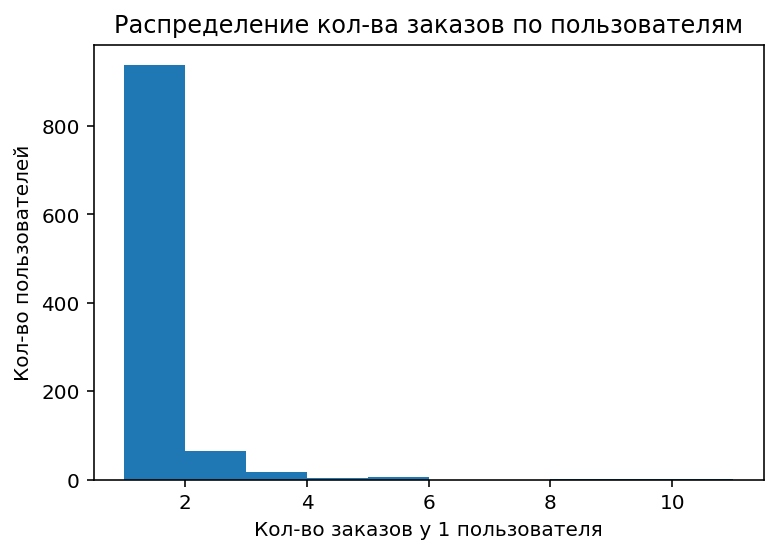

In [23]:
# найдем число заказов по пользователям
ordersByUsers = (orders.groupby('visitorId', as_index=False)
                 .agg({'transactionId': 'nunique'})
                 )
ordersByUsers.columns = ['visitorId', 'transaction']

print(ordersByUsers.sort_values(by='transaction', ascending=False).head(10))

plt.hist(ordersByUsers['transaction'])
plt.title('Распределение кол-ва заказов по пользователям')
plt.xlabel('Кол-во заказов у 1 пользователя')
plt.ylabel('Кол-во пользователей')
plt.show()

Подавляющее большинство пользователей совершает 1 заказ.

### 4.7 Посчитать 95-й и 99-й перцентили количества заказов на пользователя. Выбрать границу для определения аномальных пользователей.

In [24]:
# Метод np.percentile('column', [percentile1, percentile2, percentile3]) находит перцентили
print(np.percentile(ordersByUsers['transaction'], [90, 95, 99])) 

[1. 2. 4.]


Не более 5% совершили больше 2ух заказов, не более 1% ее более 4ех.
Выберем что больше 2ух заказов - заказы являются аномальными.

### 4.8 Построить точечный график стоимостей заказов. Сделать выводы и предположения.

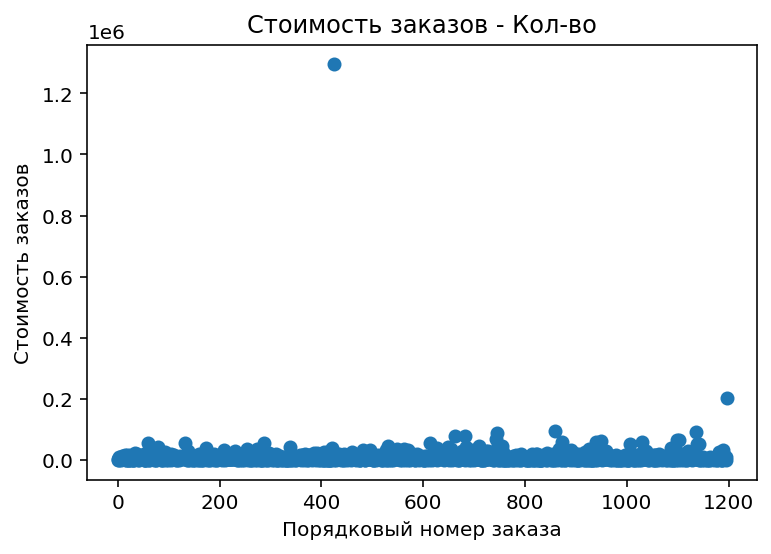

In [25]:
# серия из чисел от 0 до количества наблюдений в ordersByUsers
x_values = pd.Series(range(0, len(orders['revenue'])))
plt.scatter(x_values, orders['revenue'])
plt.title('Стоимость заказов - Кол-во')
plt.xlabel('Порядковый номер заказа')
plt.ylabel('Стоимость заказов')
plt.show()

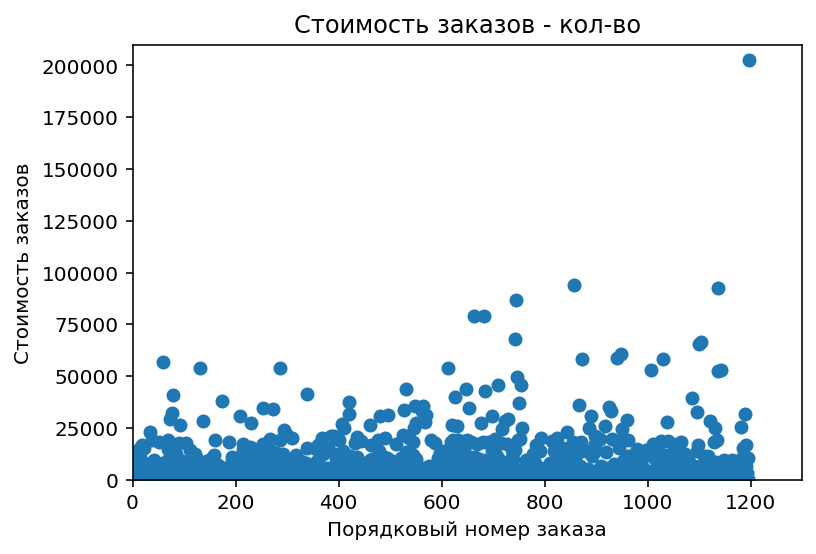

In [26]:
# серия из чисел от 0 до количества наблюдений в ordersByUsers
x_values = pd.Series(range(0, len(orders['revenue'])))
plt.scatter(x_values, orders['revenue'])
# ограничим ось Y
plt.axis([0, 1300, 0, 210000])
plt.title('Стоимость заказов - кол-во')
plt.xlabel('Порядковый номер заказа')
plt.ylabel('Стоимость заказов')
plt.show()

Заказов больше 60 000 почти нет. Аномальные заказы выглядят на 1 200 000+ и на 200 000.

### 4.9 Посчитать 95-й и 99-й перцентили стоимости заказов. Выберать границу для определения аномальных заказов.

In [27]:
print(np.percentile(orders['revenue'], [90, 95, 99]))

[18168.  28000.  58233.2]


Не более чем у 5% чек дороже 28 000. И не больше чем у 1% чек дороже 58 233. Выберем что чек больше 28000 - заказы являются аномальными.

### 4.10 Посчитать статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. Сделать выводы и предположения.

Сформулируем гипотезы. Проверка тест Манна-Уитни .mannwhitneyu():
* H0 нулевая гипотеза: отличия в среднем количестве заказов между группами А и Б -нет.
* Н1 альтернативная гипотеза: отличия в среднем между группами - Есть.

In [28]:
# Изучим таблицу
# поделим пользователей на группы А и В
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}),axis=1,)

visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}), axis=1,)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = (ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}), axis=1)
                      .sort_values(by=['date'])
                     )
ordersACummulative.columns = ['date',
                              'ordersCummulativeA',
                              'revenueCummulativeA']

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}),
    axis=1).sort_values(by=['date'])

ordersBCummulative.columns = ['date',
                              'ordersCummulativeB',
                              'revenueCummulativeB']
# дата
data = (
    ordersADaily.merge(ordersBDaily, left_on='date', right_on='date', how='left')
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)
# напечатаем сагрегированные данные
display(data.head(5))


# создадим ordersByUsersA и ordersByUsersB для пользователей,
# совершивших хотя бы 1 заказ, будет указано число заказов
ordersByUsersA = (orders[orders['group'] == 'A']
                  .groupby('visitorId', as_index=False)
                  .agg({'transactionId': pd.Series.nunique})
                  )
ordersByUsersA.columns = ['visitorId', 'orders']

ordersByUsersB = (orders[orders['group'] == 'B']
                  .groupby('visitorId', as_index=False)
                  .agg({'transactionId': pd.Series.nunique})
                  )
ordersByUsersB.columns = ['visitorId', 'orders'] 

# Объявим переменные sampleA и sampleB, в которых пользователям
# с заказами будет соответствовать число заказов пользователя
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)
sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

ordersByUsersA = (orders[orders['group'] == 'A']
                  .groupby('visitorId', as_index=False)
                  .agg({'transactionId': pd.Series.nunique}))
ordersByUsersA.columns = ['visitorId', 'orders']

ordersByUsersB = (orders[orders['group'] == 'B']
                  .groupby('visitorId', as_index=False)
                  .agg({'transactionId': pd.Series.nunique}))
ordersByUsersB.columns = ['visitorId', 'orders']

sampleA = pd.concat([ordersByUsersA['orders'],
                     pd.Series(0,
                               index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])),
                               name='orders')],
                    axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],
                     pd.Series(0,
                               index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])),
                               name='orders')],
                    axis=0)

# Применим тест Манна-Уитни, выведем p-value для сравнения среднего между группами
print('p-value:', "{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

# относительное различие в среднем между группами
print('Относительное различие в среднем между группами:', "{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,24,148579,21,101217,24,148579,21,101217,719,713,719,713
1,2019-08-02,20,93822,24,165531,44,242401,45,266748,619,581,1338,1294
2,2019-08-03,24,112473,16,114248,68,354874,61,380996,507,509,1845,1803
3,2019-08-04,16,70825,17,108571,84,425699,78,489567,717,770,2562,2573
4,2019-08-05,25,124218,23,92428,109,549917,101,581995,756,707,3318,3280


p-value: 0.017
Относительное различие в среднем между группами: 0.138


* p-value 1,7% - значительно ниже 5%, поэтому различия в среднем количестве заказов на посетителя между группами по «сырым» данным - Есть.
* Прирост среднего группы В/группе А равен 13,8%

### 4.11 Посчитать статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделать выводы и предположения.

Сформулируем гипотезы. Проверка тест Манна-Уитни .mannwhitneyu():

* H0 нулевая гипотеза: отличия в среднем чеке заказа между группами А и Б -нет.
* Н1 альтернативная гипотеза: отличия в среднем между группами - Есть.

In [29]:
# Применим тест Манна-Уитни, выведем p-value для сравнения средних чеков между группами
print('p-value:', '{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
# относительный прирост среднего чека группы B / А
print('относительный прирост среднего чека группы B / А:','{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

p-value: 0.729
относительный прирост среднего чека группы B / А: 0.259


* p-value 72,9% поэтому различий в среднем чеке заказа между группами по «сырым» между группами - Нет.
* Прирост среднего чека группы В/группе А равен 25,9%

### 4.12 Посчитать статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. Сделать выводы и предположения.

In [30]:
# определим аномальных пользователей (5% от распределения)
# которые совершили > 2 заказов
usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders'] > 2]['visitorId'],
                                ordersByUsersB[ordersByUsersB['orders'] > 2]['visitorId']],
                                axis=0)

# и определим у кого стоимость заказов превышает 95% перцентнеля (28 000)
usersWithExpensiveOrders = orders[orders['revenue'] > (np.percentile(orders['revenue'], [95])[0])]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)

f'Количество аномальных пользователей: {len(abnormalUsers)} шт.'

'Количество аномальных пользователей: 74 шт.'

In [31]:
# сохраним очищенные данные о заказах — не включая аномальных пользователей
sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['visitorId'].isin(abnormalUsers))]['orders'],
                             pd.Series(0,
                                       index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])),
                                       name='orders')],
                            axis=0)

sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['visitorId'].isin(abnormalUsers))]['orders'],
                             pd.Series(0,
                                       index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])),
                                       name='orders')],
                            axis=0)

# Применим тест Манна-Уитни, выведем p-value для сравнения
# среднем количестве заказов на посетителя
print('p-value:', '{0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
# относительный прирост среднего чека группы B / А
print('относительный прирост среднего чека группы B / А:', '{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 

p-value: 0.013
относительный прирост среднего чека группы B / А: 0.173


* Выводы схожи с выводами сырых данных, значимость достигнута, различия в среднем количестве заказов на посетителя группы В лучше группы А.
* p-value 1,3% лучше (на сырых данных было 1,7%).
* Прирост среднего группы В/группе А равен 17,3%

### 4.13 Посчитать статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделать выводы и предположения.

In [32]:
# p-value для сравнения средних чеков между очищенными группами.
print('p-value:',
      '{0:.3f}'.format(stats.mannwhitneyu(orders[np.logical_and(orders['group'] == 'A',
                                                                np.logical_not(orders['visitorId']\
                                                                               .isin(abnormalUsers)))]['revenue'],
                                          orders[np.logical_and(orders['group'] == 'B',
                                                                np.logical_not(orders['visitorId']\
                                                                               .isin(abnormalUsers)))]['revenue'])[1]
                      )
      )

# относительный прирост среднего чека очищенной группы B
print('относительный прирост среднего чека очищенной группы B:',
    "{0:.3f}".format(orders[np.logical_and(orders['group'] == 'B',
                                           np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean() \
                     / orders[np.logical_and(orders['group'] == 'A',
                                             np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean() - 1
                    )
      )

p-value: 0.738
относительный прирост среднего чека очищенной группы B: -0.020


* Статистической значимости по сравнению с не очищенными данными не появилось
* p-value 73,8% поэтому различий в среднем чеке заказа между группами по «сырым» между группами - Нет.
* Прирост среднего чека группы В/группе А -2%, это статистически значимо, значит там меньше шума.

### 4.14 Принять решение по результатам теста и объяснить его.
Варианты решений: 
1. Остановить тест, зафиксировать победу одной из групп. 
2. Остановить тест, зафиксировать отсутствие различий между группами. 
3. Продолжить тест.

**Выводы:**
* Различия в среднем количестве заказов на посетителя между группами - Есть.
* Различия в среднем чеке заказа между группами - Нет. Графики среднего чека не стабилизировались.
* В очищенных даных (без выбросов) выводы такие же и статистически цифры лучше подтверждают выводы.

* Нет смысла продолжать тест до стабилизации графиков и можно принять решение уже сейчас, поскольку получается, что продолжая тест мы подглядываем и будем ждать "нужных" результатов и тратить ресурсы. Остановить тест, зафиксировать победу группы "В" в среднем количестве заказов на посетителя.

## 5. Вывод

**5.1 Приоретизация гипотез:**

* Наиболее перспективные гипотезы по ICE:
    - Запустить акцию, дающую скидку на товар в день рождения	16.2
    - Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей 13.3

* Наиболее перспективные гипотезы RICE:
    - Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок	-112
    - Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа -56

* Гипозеза 7 по RICE на 1ом месте, а по ICE на 3ем. Потому что RICE еще учитывает Reach — скольких пользователей затронет изменение, это тоже важно и дает большой импакт, лучше выбирать по RICE.

**5.2 Анализ А/В-теста:**
* Различия в среднем количестве заказов на посетителя между группами - Есть.
* Различия в среднем чеке заказа между группами - Нет. Графики среднего чека не стабилизировались.
* В очищенных даных (без выбросов) выводы такие же и статистически цифры лучше подтверждают выводы.

* Нет смысла продолжать тест до стабилизации графиков и можно принять решение уже сейчас, поскольку получается, что продолжая тест мы подглядываем и будем ждать "нужных" результатов и тратить ресурсы. Остановить тест, зафиксировать победу группы "В" в среднем количестве заказов на посетителя.